##Laboratorio 5
#Aprendizaje no supervisado
###Integrantes:
####Barañado Méndez Alexander Nahuel
####Blanco Moya Rosa Leonor
####Cruz Grimaldez Richard Ausberto
####Fernández Núñez Diego Emiliano
####Lizarazu Nava Denis Sergio


# ML - Aprendizaje No Supervisado

Si bien todos los ejemplos de *Machine Learning* que hemos visto hasta ahora en esta serie se han basado en aprendizaje supervisado (nuestros datos van acompañados de las etiquetas correspondientes, ejemplos de la tarea que queremos llevar a cabo) la mayoría de los datos no están etiquetados. Antes esta problemática tenemos dos alternativas: etiquetar datos manualmente (lo cual require de tiempo, esfuerzo y dinero en el caso de querer desarrollar sistemas reales) o bien usar técnicas de aprendizaje no supervisado, o *Unsupervised Learning* en inglés.

## Clustering

De entre las diferentes técnicas de aprendizaje no supervisado, el *Clustering* es una de las más usadas. Este técnica consiste en identificar aquellas muestras similares del conjunto de datos y asignarlas a un *cluster*, o grupo. Esto permite aplicaciones tales como: segmentación de clientes, análisis de datos, reducción de la dimensionalidad, detección de anomalías, aprendizaje semi-supervisado, motores de búsqueda e incluso la semgentación de imágenes.

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np

# Generar entre 1 y 10 centroides aleatorios
num_clusters = np.random.randint(1, 11)

# Asegurar una distancia considerable entre los centros (entre -20 y 20)
blob_centers = np.random.uniform(low=-10, high=10, size=(num_clusters, 2))

# Generar una desviación estándar pequeña para cada cluster
blob_std = np.random.uniform(low=1.0, high=1.5, size=num_clusters)

# Crear el dataset usando make_blobs con los centros y las desviaciones estándar generadas
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

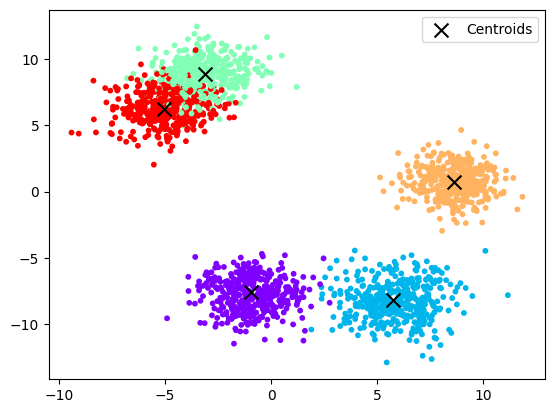

In [ ]:
# Para ver cómo se distribuyen los puntos y los centroides generados
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap="rainbow")
plt.scatter(blob_centers[:, 0], blob_centers[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.legend()
plt.show()


En *Scikit-Learn* puedes usar el objeto [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), indicando el número de clusters deseado.  

In [ ]:
from sklearn.cluster import KMeans
#Definimos el numero de clusters
k = 9
#Inicialización del modelo KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
#Ajustamos el modelo y predecimos etiquetas
y_pred = kmeans.fit_predict(X)
y_pred

array([7, 1, 0, ..., 2, 5, 1], dtype=int32)

In [ ]:
#Coordenadas de los centroides
kmeans.cluster_centers_

array([[-1.38877179, -8.73912534],
       [-2.94910009,  9.7297084 ],
       [ 8.95588831, -0.19054977],
       [ 5.88824795, -8.25044977],
       [-5.05169957,  7.8067158 ],
       [-0.44974039, -6.86577251],
       [ 8.30259247,  1.54825475],
       [-2.51729247,  7.520848  ],
       [-5.26708798,  5.48401429]])

In [ ]:
X_new = np.array([[6, -8], [3, 2],[3, 8],[2, 2],[3, 2],[1, 3],[-5, 2],[-3, -5],[-3-5, 2]])
kmeans.predict(X_new)

array([3, 6, 7, 6, 6, 7, 8, 5, 8], dtype=int32)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#Grafica los datos de X
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

#Dibuja los centroides
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

#Dibuja las fronteras de desicion
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

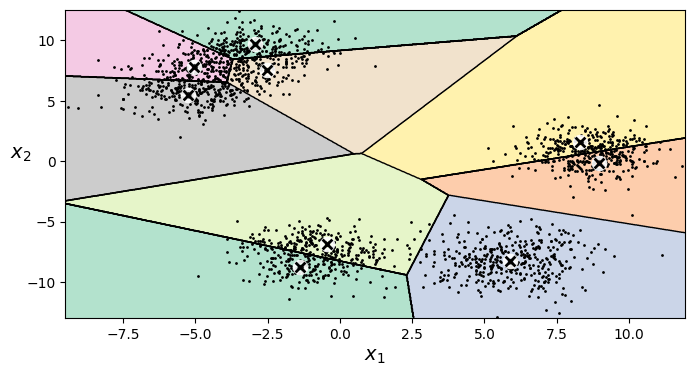

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [ ]:
#El método kmeans.transform(X_new)
#devuelve la distancia de cada punto en X_new a cada uno de los centroides del modelo KMeans
kmeans.transform(X_new)

array([[ 7.42564845, 19.86023546,  8.35013704,  0.274251  , 19.28710263,
         6.54871156,  9.82197031, 17.70426484, 17.5717362 ],
       [11.60129868,  9.75398297,  6.34595255, 10.64958669,  9.92712518,
         9.51328708,  5.32180051,  7.80514438,  8.97123734],
       [17.30490205,  6.19545665, 10.12707811, 16.50512327,  8.05401917,
        15.26079622,  8.35119774,  5.53805948,  8.64146561],
       [11.26110951,  9.17834319,  7.29266004, 10.96312878,  9.13479147,
         9.19799708,  6.3187614 ,  7.13342091,  8.05908949],
       [11.60129868,  9.75398297,  6.34595255, 10.64958669,  9.92712518,
         9.51328708,  5.32180051,  7.80514438,  8.97123734],
       [11.97970344,  7.8028435 ,  8.57180066, 12.26652306,  7.72836234,
         9.97172074,  7.4454967 ,  5.72795015,  6.74141816],
       [11.33003894,  7.9971609 , 14.12675924, 14.95411863,  5.80694594,
         9.96527896, 13.31026071,  6.05339569,  3.49423691],
       [ 4.0715003 , 14.72979634, 12.88697314,  9.46395136, 12

In [ ]:
# init="random": Los centroides iniciales se seleccionan de forma aleatoria.
# n_init=1: Solo se inicializa el algoritmo una vez (en lugar de probar múltiples inicializaciones y seleccionar la mejor).
# algorithm="full": Utiliza la implementación estándar del algoritmo K-Means.
kmeans_iter1 = KMeans(n_clusters=9, init="random", n_init=1,
                      algorithm="lloyd", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=9, init="random", n_init=1,
                      algorithm="lloyd", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=9, init="random", n_init=1,
                      algorithm="lloyd", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=9, n_init=1, random_state=1)

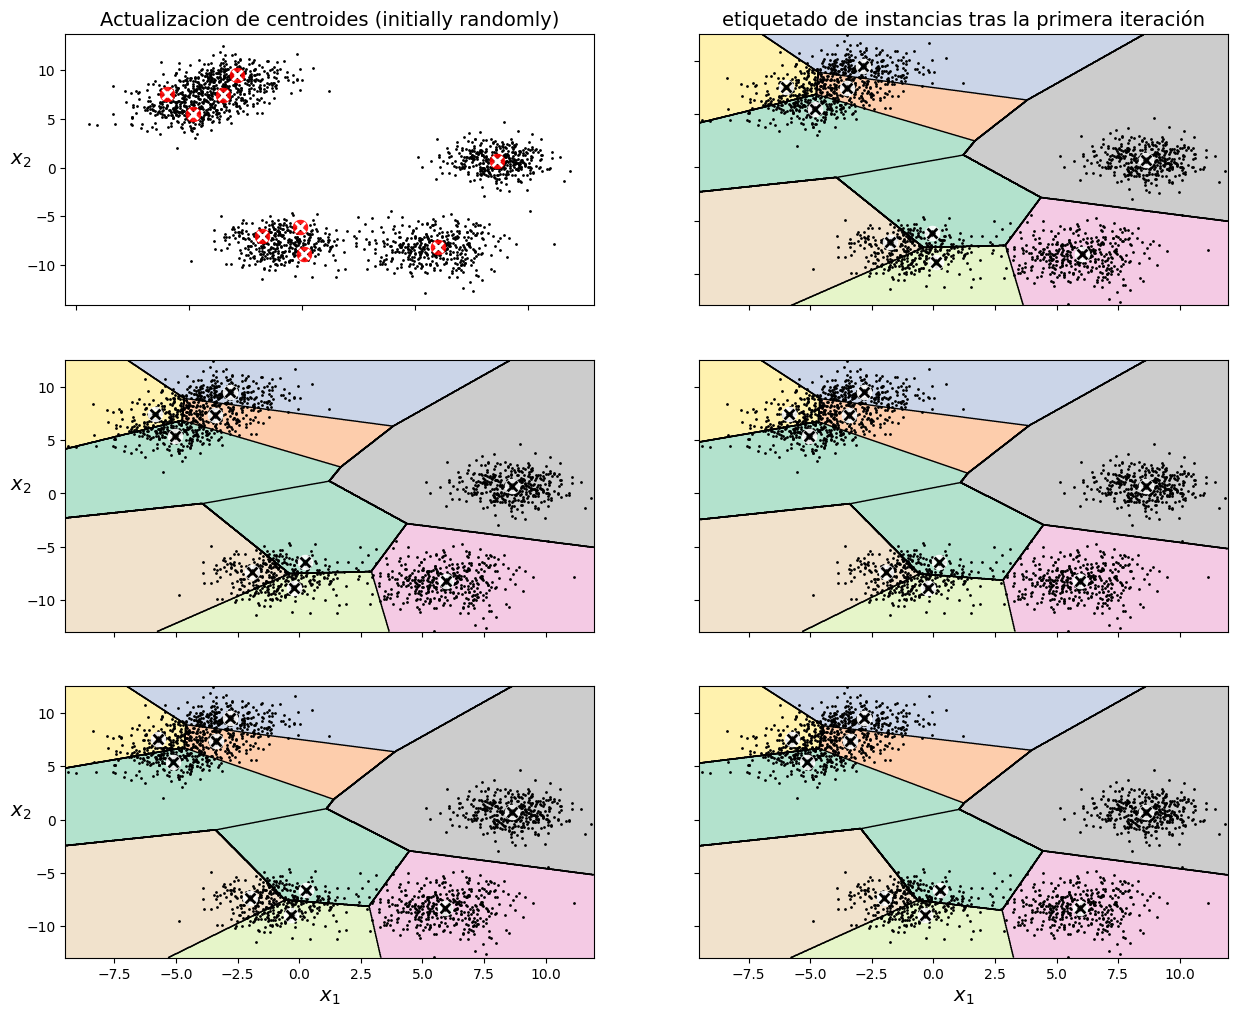

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Actualizacion de centroides (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("etiquetado de instancias tras la primera iteración", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

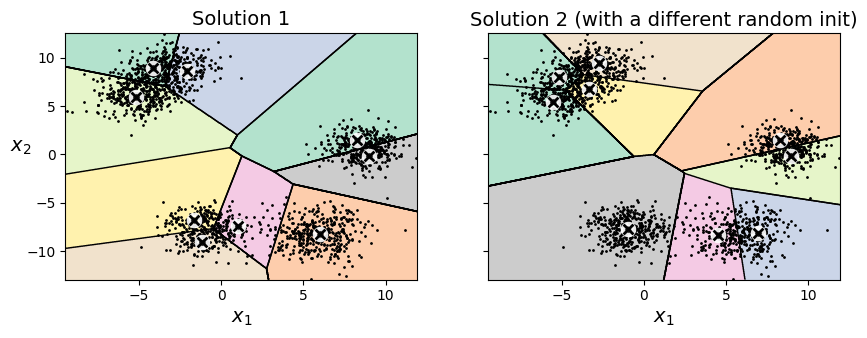

In [ ]:
# Dos modelos KMeans pero con diferentes semillas aleatorias para la inicialización de los centroides.
kmeans_rnd_init1 = KMeans(n_clusters=9, init="random", n_init=1,
                         algorithm="lloyd", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=9, init="random", n_init=1,
                         algorithm="lloyd", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

In [ ]:
# n_init=10: Este parámetro indica que el algoritmo se ejecutará 20 veces con diferentes inicializaciones aleatorias.
# Al final, se seleccionará la mejor solución (es decir, la que tenga el menor error cuadrático medio).
kmeans_rnd_10_inits = KMeans(n_clusters=9, init="random", n_init=10,
                              algorithm="lloyd", random_state=14)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=9, n_init=10, random_state=14)

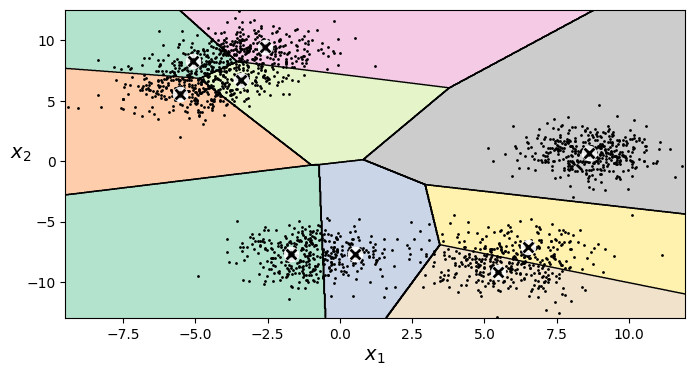

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()


El algoritmo de mini-batch K-Means es más rápido que K-Means normal, pero su precisión suele ser peor.


> Encontrando el número óptimo de grupos


Como hemos visto anteriormente, el número de grupos o clusters es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el silhouette score, que se basa en calcular el coeficiente de silueta (silhouette coefficient) de todas las muestras del dataset como  (b−a)/max(a,b)  donde  a  es la distancia mínima al resto de muestras del mismo grupo y  b  es la distancia media de los grupos más cercanos. Su valor se encuentra entre  1  y  −1 . Un valor cercano a  1  indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a  0  indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a  −1  indica que la muestra está en el grupo incorrecto.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.38356725548626897

Calculando la métrica para diferentes números de clusters podemos encontrar el valor óptimo.

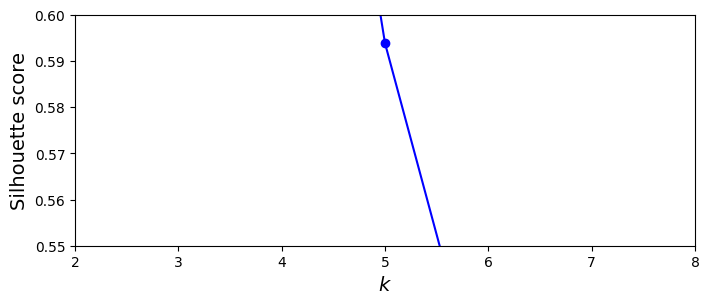

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([2, 8, 0.55, 0.6])
plt.show()

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.


Mod

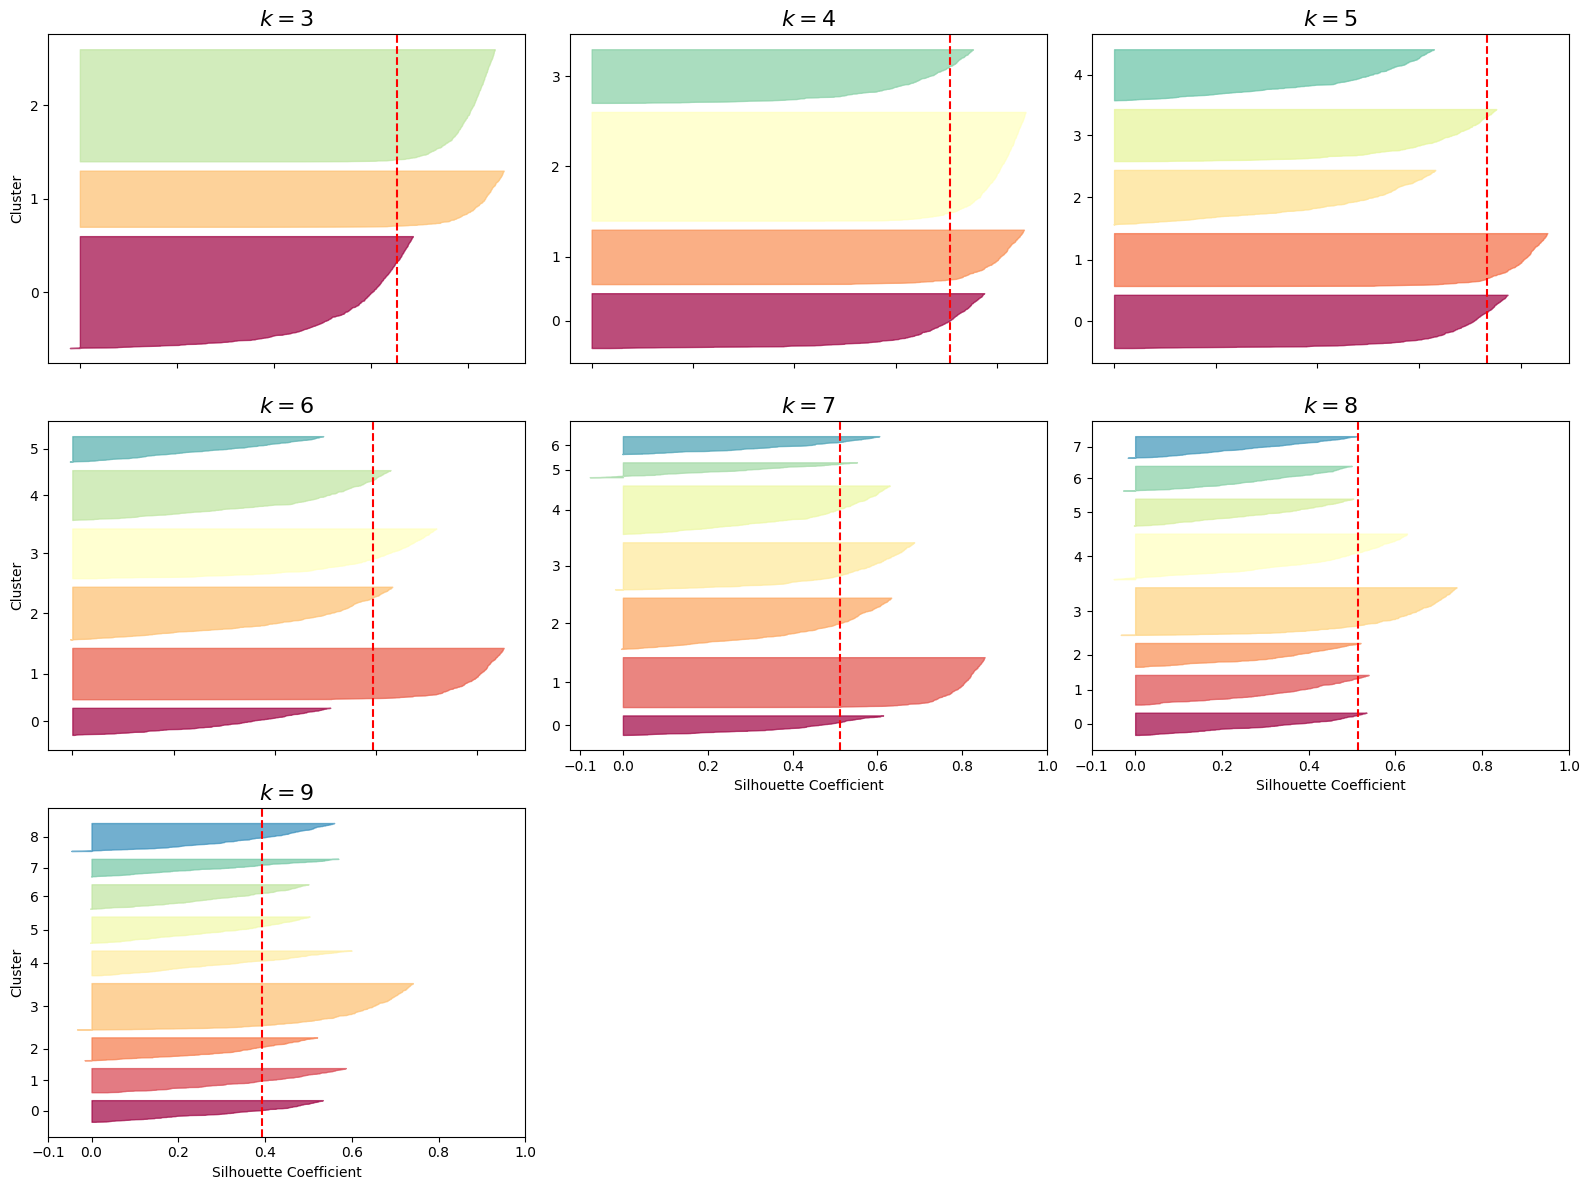

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Supongo que ya tienes definidos kmeans_per_k y X, además de silhouette_scores

plt.figure(figsize=(16, 12))  # Ajuste del tamaño de la figura

# Bucle que itera sobre los valores de k desde 3 hasta 9
for k in range(3, 10):
    plt.subplot(3, 3, k - 2)  # Ahora hay un grid de 3x3 para acomodar 9 gráficos

    # Asignación de etiquetas a cada punto en el dataset para k clusters
    y_pred = kmeans_per_k[k - 1].labels_

    # Cálculo de los coeficientes silhouette
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []

    # Para cada cluster, dibuja los coeficientes silhouette
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)  # Colores diferenciados para cada cluster
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    # Personalización de los ejes y etiquetas
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 6, 9):
        plt.ylabel("Cluster")

    if k in (7, 8, 9):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    # Línea vertical que indica la puntuación promedio del coeficiente silhouette
    plt.axvline(x=silhouette_scores[k - 3], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.tight_layout()  # Ajusta el layout para evitar solapamientos
plt.show()

##APRENDIZAJE SEMISUPERVISADO

In [ ]:
pip install pillow pandas numpy

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image

 #Montar Google Drive en Colab
from google.colab import drive
drive.mount('/content/drive')

# Ruta donde se almacenan las imágenes PNG en Google Drive
ruta_imagenes = '/content/drive/MyDrive/datasets/mydatasetsia/fruits'
# Ruta de la carpeta que contiene las imágenes
#image_folder = 'https://drive.google.com/drive/folders/10m7X518CC9hfDLBs4OVTVS45bsYWR-a4?usp=drive_link'

# Lista para almacenar las características de cada imagen
image_data = []

# Procesar cada archivo de imagen en la carpeta
for image_file in os.listdir(image_data):
    if image_file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # Asegúrate de usar los formatos de imagen correctos
        # Ruta completa del archivo de imagen
        image_path = os.path.join(image_folder, image_file)

        # Abrir la imagen usando PIL
        with Image.open(image_path) as img:
            # Convertir la imagen a escala de grises (opcional)
            img = img.convert('L')

            # Redimensionar la imagen a un tamaño fijo (opcional, dependiendo del tamaño de las imágenes)
            img = img.resize((64, 64))  # Ejemplo de redimensionado a 64x64 píxeles

            # Convertir la imagen a un array de Numpy
            img_array = np.array(img).flatten()  # Aplanar la imagen para obtener un vector unidimensional

            # Añadir el array al dataset
            image_data.append(img_array)

# Convertir la lista de imágenes a un DataFrame de pandas
df = pd.DataFrame(image_data)

# Guardar el DataFrame como un archivo CSV
df.to_csv('imagenes_convertidas.csv', index=False)

print("Las imágenes han sido convertidas y guardadas en 'imagenes_convertidas.csv'.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TypeError: listdir: path should be string, bytes, os.PathLike, integer or None, not list

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()  # Subir tu archivo 'kaggle.json'

# Crear la carpeta para almacenar el archivo
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset de Kaggle
!kaggle datasets download -d moltean/fruits

# Descomprimir el dataset
!unzip fruits.zip -d ./fruits

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
fruits.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fruits.zip
replace ./fruits/fruits-360_dataset_100x100/fruits-360/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image

# Cambiar la ruta a la ubicación correcta en Google Drive
ruta_imagenes = '/content/drive/MyDrive/datasets/mydatasetsia/fruits'

# Crear una lista para almacenar los arrays de imágenes y los nombres de archivo
imagenes_data = []
nombres_archivos = []

# Iterar sobre las imágenes en la carpeta
for carpeta in os.listdir(ruta_imagenes):
    ruta_carpeta = os.path.join(ruta_imagenes, carpeta)
    if os.path.isdir(ruta_carpeta):
        for archivo in os.listdir(ruta_carpeta):
            if archivo.endswith('.png'):  # Asegúrate de que las imágenes sean PNG o ajusta según corresponda
                # Abrir la imagen
                img = Image.open(os.path.join(ruta_carpeta, archivo))
                # Convertir la imagen a escala de grises
                img = img.convert('L')
                # Convertir la imagen a un array de numpy y aplanar
                img_array = np.array(img).flatten()
                # Añadir el array al dataset
                imagenes_data.append(img_array)
                nombres_archivos.append(archivo)

# Convertir la lista de imágenes a un array de numpy
data = np.array(imagenes_data)
# A partir de aquí puedes continuar con el proceso de clustering
print(f"Se han cargado {len(data)} imágenes con éxito.")

Se han cargado 0 imágenes con éxito.


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.cluster import KMeans

Ruta donde se almacenan las imágenes PNG
ruta_imagenes = 'https://www.kaggle.com/datasets/moltean/fruits'

Crear una lista para almacenar los arrays de imágenes y los nombres de archivo
imagenes_data = []
nombres_archivos = []  # Para almacenar los nombres de archivo

# # Iterar sobre las imágenes en la carpeta
# for archivo in os.listdir(ruta_imagenes):
#     if archivo.endswith('.png'):
#         # Abrir la imagen
#         img = Image.open(os.path.join(ruta_imagenes, archivo))
#         # Convertir la imagen a escala de grises
#         img = img.convert('L')
#         # Convertir la imagen a un array de numpy y aplanar
#         img_array = np.array(img).flatten()
#         # Añadir el array al dataset y el nombre del archivo
#         imagenes_data.append(img_array)
#         nombres_archivos.append(archivo)  # Guardar el nombre del archivo

# # Convertir la lista de imágenes a un array de numpy
# data = np.array(imagenes_data)

# # Aplicar KMeans para clustering
# n_clusters = 2  # Cambia este valor según el número deseado de clusters
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# kmeans.fit(data)

# # Obtener etiquetas asignadas
# etiquetas = kmeans.labels_

# # Crear un DataFrame con los datos y las etiquetas
# df = pd.DataFrame(data)  # Crear DataFrame a partir de los datos de imágenes
# df['Etiqueta'] = etiquetas  # Añadir la columna de etiquetas

# # Reorganizar las columnas (opcional)
# # df = df[['Etiqueta'] + [col for col in df.columns if col not in ['Etiqueta']]]

# # Guardar el DataFrame en un archivo CSV
# df.to_csv('dataset_imagenes_con_etiquetas.csv', index=False)

# print('Etiquetas guardadas en dataset_imagenes_con_etiquetas.csv')

# # Separar en X (características) e y (etiquetas)
# X_final = df.drop(['Etiqueta',], axis=1)  # Características (imágenes)
# y_final = df['Etiqueta']  # Etiquetas

# # Mostrar las dimensiones de X e y
# print(f'Dimensiones de X: {X_final.shape}, Dimensiones de y: {y_final.shape}')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

NameError: name 'X_final' is not defined

In [ ]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Cargar el dataset (si ya lo tienes guardado en CSV)
data = pd.read_csv('dataset_imagenes_con_etiquetas.csv')

# Normalizar los datos (esto es importante para algoritmos como k-means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Definir el rango de k (número de clusters) que vamos a probar
rango_k = range(2, 11)

# Lista para almacenar los silhouette scores
silhouette_scores = []

# Aplicar k-means y calcular el Silhouette Score para cada valor de k
for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    etiquetas = kmeans.fit_predict(data_scaled)

    # Calcular el silhouette score
    score = silhouette_score(data_scaled, etiquetas)
    silhouette_scores.append(score)
    print(f'Para k={k}, Silhouette Score: {score}')

# Crear una gráfica de Silhouette Score vs número de clusters (k)
plt.figure(figsize=(8, 6))
plt.plot(list(rango_k), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Número de Clusters (k)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Encontrar el k con el Silhouette Score más alto
k_optimo = rango_k[np.argmax(silhouette_scores)]
print(f'El número óptimo de clusters es {k_optimo} con un Silhouette Score de {max(silhouette_scores)}')


In [ ]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
# distancias de cada punto a los centroides
X_digits_dist = kmeans.fit_transform(X_train)

In [ ]:
# datos mas cercanos al centroide
idxs = np.argmin(X_digits_dist, axis=0)
# Indices de los datos mas cercanos al centroide
X_representative_digits = X_train.values[idxs]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

def plot_data_2d_with_clusters(X, n_clusters=2):
    # Reducción de dimensionalidad a 2D
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)

    # Ajustar el modelo de clustering (KMeans)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    # Obtener las etiquetas de cluster asignadas a cada punto
    cluster_labels = kmeans.labels_

    # Dibujar los puntos de datos con colores según el cluster al que pertenecen
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap='viridis', s=10)
    plt.colorbar(label='Cluster')

    # Dibujar los centroides
    centroids_2d = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='x', c='red', s=100, label='Centroids')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Data with Clusters in 2D')
    plt.legend()

# Suponiendo que X_train_n es tu conjunto de datos de entrenamiento
plot_data_2d_with_clusters(X_train)
plt.show()


In [ ]:
# etiquetas de las imágenes representativas
y_representative_digits = y_train.values[idxs]

In [ ]:
from sklearn.linear_model import LogisticRegression

# multi_class="ovr": Este parámetro indica que se utilizará el enfoque de "uno contra el resto"
# solver="lbfgs": Este parámetro especifica el algoritmo que se utilizará para optimizar la
# función de costo. "lbfgs" es un método de optimización que se utiliza comúnmente en regresión logística
# y es eficiente para problemas de gran tamaño.
# max_iter=5000: Este parámetro establece el número máximo de iteraciones que el optimizador realizará
# para encontrar la solución
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

# Este método entrena el modelo de regresión logística usando los datos de entrenamiento.
%time log_reg.fit(X_representative_digits, y_representative_digits)

# Este método evalúa el rendimiento del modelo entrenado usando el conjunto de prueba
log_reg.score(X_test, y_test)

In [ ]:
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_train[:50], y_train[:50])
log_reg2.score(X_test, y_test)

In [ ]:
y_train_propagated = np.empty(len(X_train))

# kmeans.labels contiene todas las etiquetas de X_train
# devolviendo un true o false depende de la etiqueta y de la variable i
# y_train_propagated servira para obtener a todas las etiquetas 0 en la primera iteracion y seguira subiendo
# Entonces se asigna a los resultados verdaderos el numero de cluster representativo
for i in range(k): # 0 k-1
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

##APRENDIZAJE ACTIVO

In [ ]:
# Se utiliza para predecir las probabilidades de cada clase para las primeras 1000 muestras en X_train
probas = log_reg3.predict_proba(X_train[:1000])
# Devuelve el índice de la clase con la probabilidad más alta para cada muestra
labels_ixs = np.argmax(probas, axis=1)
# Aquí se crea un nuevo array labels que contiene las probabilidades más altas para cada muestra,
# utilizando los índices de labels_ixs
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
# DFinalmente, se seleccionan las 10 muestras con las probabilidades más bajas (es decir, las más inciertas)
# al indexar labels con los primeros 10 índices de sorted_ixsevuelve los índices que ordenarían el
# array labels en orden ascendente.
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]]

In [ ]:
X_lowest = X_train.values[500:1000][sorted_ixs[:k]]

# Asegúrate de que k sea un número positivo
k = min(k, len(X_lowest))  # Asegúrate de que k no exceda la cantidad de imágenes a mostrar

# Crea la figura para las imágenes
plt.figure(figsize=(15, 8))  # Aumenta el tamaño de la figura

# Determina el número de filas y columnas
n_cols = 2  # Cambia a 5 columnas para mostrar mejor
n_rows = (k // n_cols) + (k % n_cols > 0)  # Calcula el número de filas

# Itera sobre las imágenes seleccionadas
for index, img in enumerate(X_lowest[:k]):  # Asegúrate de limitar a k imágenes
    plt.subplot(n_rows, n_cols, index + 1)  # Usa n_rows y n_cols
    plt.imshow(img.reshape(64, 64), cmap="binary", interpolation="bilinear", aspect='auto')  # Cambia a 64x64
    plt.axis('off')  # Elimina los ejes

# Ajustar el espaciado entre subgráficas
plt.tight_layout()  # Esto ayuda a evitar superposiciones
plt.show()

In [ ]:
# Obtiene las primeras 1000 etiquetas del conjunto de entrenamiento
# Es un array que contiene los índices de las probabilidades clasificadas
y_lowest = y_train.values[:1000][sorted_ixs[:k]]
# seleccionas las etiquetas que corresponden a esas imágenes de baja probabilidad
y_lowest

In [ ]:
# es un array que contiene las etiquetas propagadas para las imágenes de entrenamiento (etiquetas asignadas
# automaticamente)
y_train2 = y_train_propagated[:1000].copy()
# sorted son los índices de las imágenes con las probabilidades más bajas de clasificación
# estás reemplazando las etiquetas de las imágenes de baja probabilidad (que están en y_train2 en esos índices)
# con las nuevas etiquetas que has obtenido y almacenado en y_lowest
y_train2[sorted_ixs[:k]] = y_lowest

In [ ]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=4000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)

## DBSCAN

In [ ]:
# Importa la función make_moons, que genera un conjunto de datos en forma de dos lunas.
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
# Graficar los datos
plt.figure(figsize=(8, 6))  # Tamaño de la figura
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)  # Graficar los puntos con color según la clase
plt.title('Datos de make_moons con 1000 muestras y noise=0.05', fontsize=14)  # Título
plt.xlabel('$x_1$', fontsize=14)  # Etiqueta del eje x
plt.ylabel('$x_2$', fontsize=14)  # Etiqueta del eje y
plt.grid(True)  # Mostrar la cuadrícula
plt.show()  # Mostrar la gráfica

In [ ]:
from sklearn.cluster import DBSCAN
# Crea una instancia del modelo DBSCAN
# eps=0.05: Este parámetro define la distancia máxima entre dos puntos para que se consideren
# parte del mismo grupo (o cluster).
# En este caso, si la distancia entre dos puntos es menor o igual a 0.05, se consideran "vecinos".
# min_samples=5: Este parámetro establece el número mínimo de puntos necesarios para formar un cluster.
dbscan = DBSCAN(eps=0.05, min_samples=5)
# Este método ajusta el modelo DBSCAN a los datos X generados anteriormente.
dbscan.fit(X)

In [ ]:
# Este atributo contiene las etiquetas de cluster para cada punto en el conjunto de datos X
np.unique(dbscan.labels_)

In [ ]:
# creando una nueva instancia del algoritmo DBSCAN
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)
np.unique(dbscan2.labels_)

In [ ]:
import matplotlib.pyplot as plt
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    # Identifica los puntos centrales y sus indices
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    # Marca el ruido
    anomalies_mask = dbscan.labels_ == -1
    #  Marca los puntos neutros, ni centrales ni ruido
    non_core_mask = ~(core_mask | anomalies_mask)

    # cores: Contiene los puntos centrales de los clusters.
    # anomalies: Contiene los puntos clasificados como ruido.
    # non_cores: Contiene los puntos que pertenecen a clusters pero no son puntos centrales.
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [ ]:
plt.figure(figsize=(9, 3.2))
# Primer gráfico (izquierda): Utiliza el modelo dbscan con eps=0.05 y muestra los clusters generados con estos parámetros.
# Segundo gráfico (derecha): Utiliza el modelo dbscan2 con eps=0.2, que genera un agrupamiento diferente debido a un valor de eps más alto.
plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()